In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [45]:
insurance_dataset = pd.read_csv('./insurance.csv')

In [46]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [48]:
insurance_dataset.shape

(1338, 7)

Categorical Features
- Sex
- Smoker
- Region


In [49]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [50]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

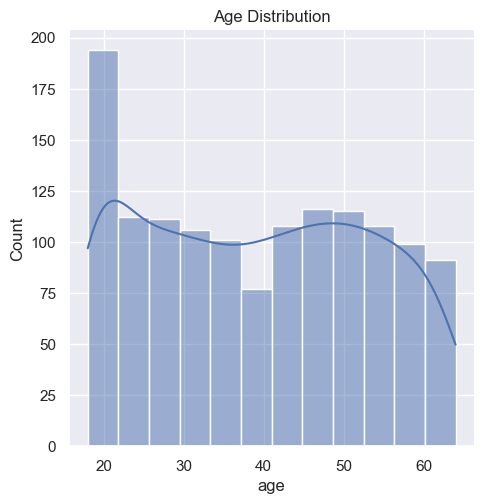

In [51]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'],kde=True)
plt.title('Age Distribution')
plt.show()

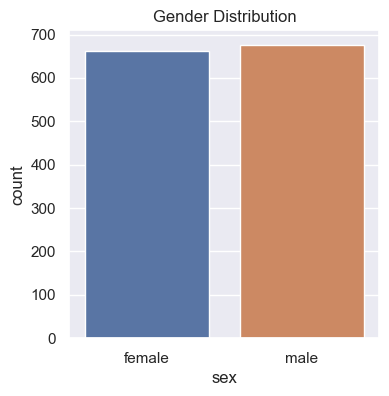

In [52]:
plt.figure(figsize=(4,4))
sns.countplot(x='sex',data=insurance_dataset,hue='sex')
plt.title('Gender Distribution')
plt.show()

In [53]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

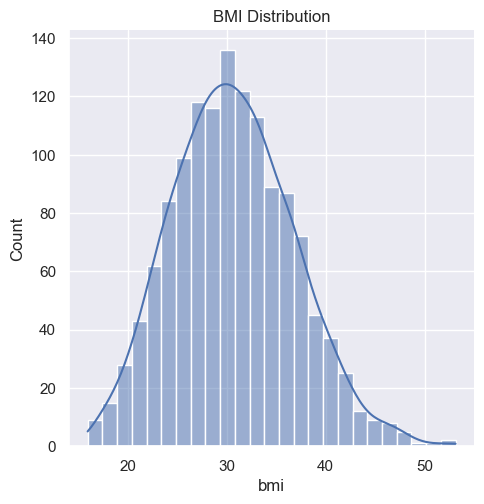

In [54]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'],kde=True)
plt.title('BMI Distribution')
plt.show()

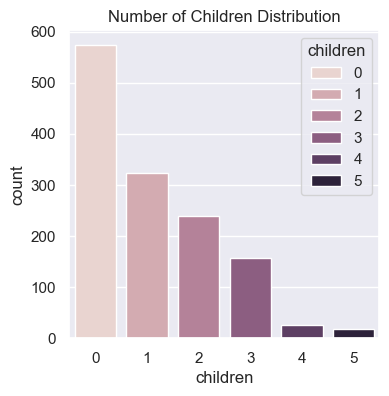

In [55]:
plt.figure(figsize=(4,4))
sns.countplot(x='children',data=insurance_dataset,hue='children')
plt.title('Number of Children Distribution')
plt.show()

In [56]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

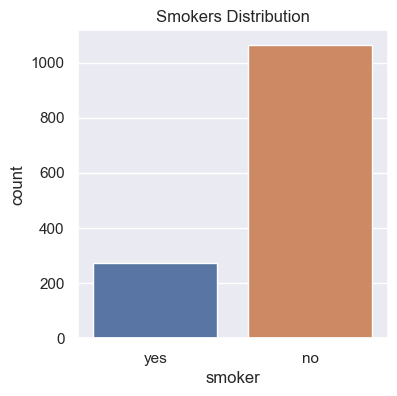

In [57]:
plt.figure(figsize=(4,4))
sns.countplot(x='smoker',data=insurance_dataset,hue='smoker')
plt.title('Smokers Distribution')
plt.show()

In [58]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

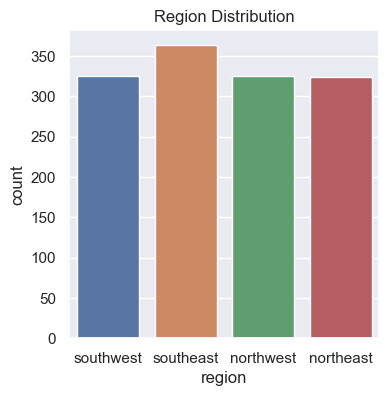

In [59]:
plt.figure(figsize=(4,4))
sns.countplot(x='region',data=insurance_dataset,hue='region')
plt.title('Region Distribution')
plt.show()

In [60]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

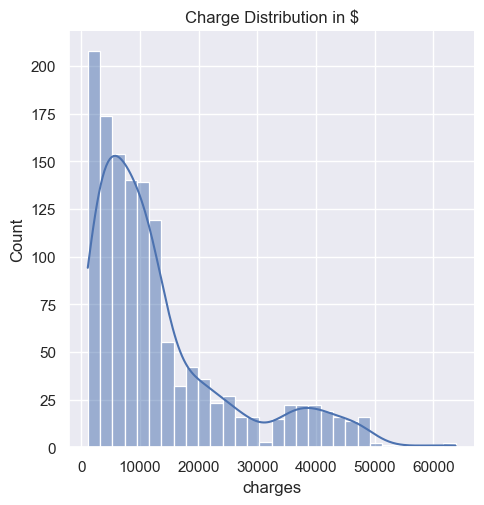

In [61]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'],kde=True)
plt.title('Charge Distribution in $')
plt.show()

# Data Pre-Processing

### Converting categorical values to numerical values called encoding

In [62]:
insurance_dataset.replace({'sex': {"male":0,"female":1}},inplace =True)

In [63]:
insurance_dataset.replace({'smoker': {"yes":0,"no":1}},inplace =True)
insurance_dataset.replace({'region': {"southeast":0,"southwest":1, "northeast":2, "northwest":3}},inplace =True)

In [64]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# Spliting Features and Target

In [65]:
X = insurance_dataset.drop(columns="charges",axis=1)
Y = insurance_dataset['charges']

In [66]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [67]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### Train Test Split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [69]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Importing Different Models

In [70]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Training Linear Reg Model

In [71]:
lin_regressor = LinearRegression()

In [72]:
lin_regressor.fit(X_train,Y_train)

LinearRegression()

In [73]:
training_data_prediction = lin_regressor.predict(X_train)

In [74]:
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print("R Square value: ", r2_train)

R Square value:  0.751505643411174


In [75]:
test_data_prediction = lin_regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print("R Square value: ", r2_test)

R Square value:  0.7447273869684077


# Training using SVR

In [76]:
model_SVR = SVR()

In [77]:
model_SVR.fit(X_train,Y_train)

SVR()

In [78]:
svr_training_predict = model_SVR.predict(X_train)
r2_svr_train = metrics.r2_score(Y_train, svr_training_predict)
r2_svr_train

-0.11104302786402909

In [79]:
test_svr_predict = model_SVR.predict(X_test)
r2_svr_test = metrics.r2_score(Y_test,test_svr_predict)
print("R Square value: ", r2_svr_test)

R Square value:  -0.08038132828590361


# Training USING RANDOM FOREST

In [104]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train,Y_train)

RandomForestRegressor()

In [81]:
rf_training_predict = model_rf.predict(X_train)
r2_rf_train = metrics.r2_score(Y_train, rf_training_predict)
r2_rf_train

0.9773263536314865

In [82]:
test_rf_predict = model_rf.predict(X_test)
r2_rf_test = metrics.r2_score(Y_test,test_rf_predict)
print("R Square value: ", r2_rf_test)

R Square value:  0.8355786664738735


# Training Using Gradient Boost

In [83]:
model_gr = GradientBoostingRegressor()
model_gr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [84]:
gr_training_predict = model_gr.predict(X_train)
r2_gr_train = metrics.r2_score(Y_train, gr_training_predict)
r2_gr_train

0.9054241915138913

In [85]:
test_gr_predict = model_gr.predict(X_test)
r2_gr_test = metrics.r2_score(Y_test,test_gr_predict)
print("R Square value: ", r2_gr_test)

R Square value:  0.8683477007018195


In [86]:
df1 = pd.DataFrame({'Actual': Y_test, 'LR': test_data_prediction,'SVM':test_svr_predict,'RF':test_rf_predict,'GB':test_gr_predict})

In [87]:
df1

,Actual,LR,SVM,RF,GB
17,2395.17155,1520.592422,9195.367327,4246.286486,3997.205442
1091,11286.53870,11570.592018,9380.383114,11756.992649,12159.050017
273,9617.66245,10082.438499,9349.482569,13975.969027,11134.165033
270,1719.43630,2246.217543,9182.203618,2329.583714,3009.267748
874,8891.13950,7881.283620,9307.373685,9562.813125,10056.388319
...,...,...,...,...,...
232,1727.78500,-1669.890650,9190.275192,1969.929808,6619.419081
323,11566.30055,15722.419522,9391.639091,16266.000251,13566.571354
1337,29141.36030,36968.055645,9408.339335,28755.816120,28319.448971
1066,8978.18510,12987.364848,9341.251773,10673.639794,10065.341206


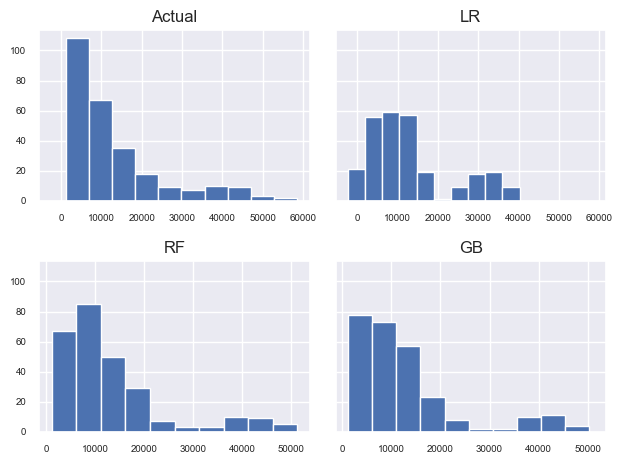

In [88]:
lfig,ax =plt.subplots(2,2, sharex='row',sharey='all')
ax[0,0].hist(df1['Actual'])
ax[0,0].title.set_text("Actual")
ax[0,0].tick_params(axis = 'both',labelsize=7)
ax[0,1].hist(df1['LR'])
ax[0,1].title.set_text("LR")
ax[0,1].tick_params(axis = 'both',labelsize=7)
ax[1,0].hist(df1['RF'])
ax[1,0].title.set_text("RF")
ax[1,0].tick_params(axis = 'both',labelsize=7)
ax[1,1].hist(df1['GB'])
ax[1,1].title.set_text("GB")
ax[1,1].tick_params(axis = 'both',labelsize=7)
plt.tight_layout()
plt.show()

In [89]:
df_melted = df1.melt(var_name='Model', value_name='Value')

In [90]:
# plt.figure(figsize=(10, 6))
# #sns.histplot(data=df_melted, x='Value', hue='Model', multiple='stack', kde=True, bins =100)
# sns.kdeplot(data=df_melted, x='Value', hue='Model', fill=True)  # `fill=True` fills the area under the KDE curve
# plt.title('Histograms of Different Models')
# plt.show()

In [91]:
df1.max()

Actual    58571.074480
LR        40198.166711
SVM        9420.796619
RF        51237.539771
GB        50379.109404
dtype: float64

In [92]:
a = insurance_dataset['charges'].idxmax()

In [93]:
a

543

In [94]:
insurance_dataset['charges'].mode()

0    1639.5631
Name: charges, dtype: float64

In [95]:
ymax= df1['Actual'].idxmax()
ymax

577

In [96]:
xval= df1.loc[ymax, 'Actual']
xval

58571.07448

In [97]:
df2 = df1.drop(columns=['SVM'])
df2

,Actual,LR,RF,GB
17,2395.17155,1520.592422,4246.286486,3997.205442
1091,11286.53870,11570.592018,11756.992649,12159.050017
273,9617.66245,10082.438499,13975.969027,11134.165033
270,1719.43630,2246.217543,2329.583714,3009.267748
874,8891.13950,7881.283620,9562.813125,10056.388319
...,...,...,...,...
232,1727.78500,-1669.890650,1969.929808,6619.419081
323,11566.30055,15722.419522,16266.000251,13566.571354
1337,29141.36030,36968.055645,28755.816120,28319.448971
1066,8978.18510,12987.364848,10673.639794,10065.341206


In [98]:
df_melted2 = df2.melt(var_name='Model', value_name='Value')


In [99]:
df_melted2["Model"].unique()

array(['Actual', 'LR', 'RF', 'GB'], dtype=object)

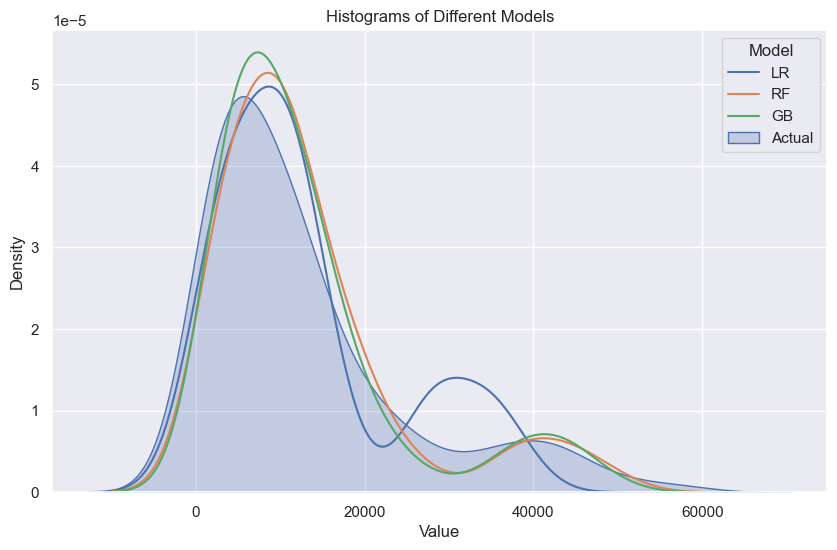

In [100]:
plt.figure(figsize=(10, 6))
for model in df_melted2['Model'].unique():
    if model != 'Actual':
        sns.kdeplot(data=df_melted2[df_melted2['Model'] == model], x='Value', fill=False,label = model)
sns.kdeplot(data=df_melted2[df_melted2['Model'] == 'Actual'], x='Value', fill=True, label='Actual')  # `fill=True` fills the area under the KDE curve
plt.title('Histograms of Different Models')
plt.legend(title='Model')
plt.show()

<Figure size 1000x600 with 0 Axes>

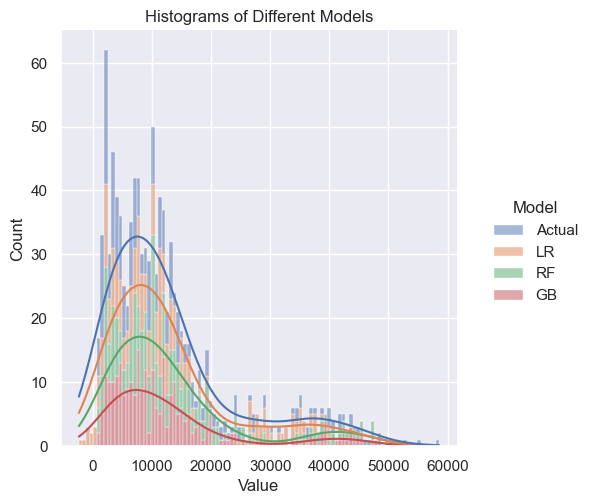

In [101]:
plt.figure(figsize=(10, 6))
sns.displot(data=df_melted2, x='Value', hue='Model', multiple='stack', kde=True, bins =100) 
#sns.kdeplot(data=df_melted2, x='Value', hue='Model', fill=True)  # `fill=True` fills the area under the KDE curve
plt.title('Histograms of Different Models')
plt.show()

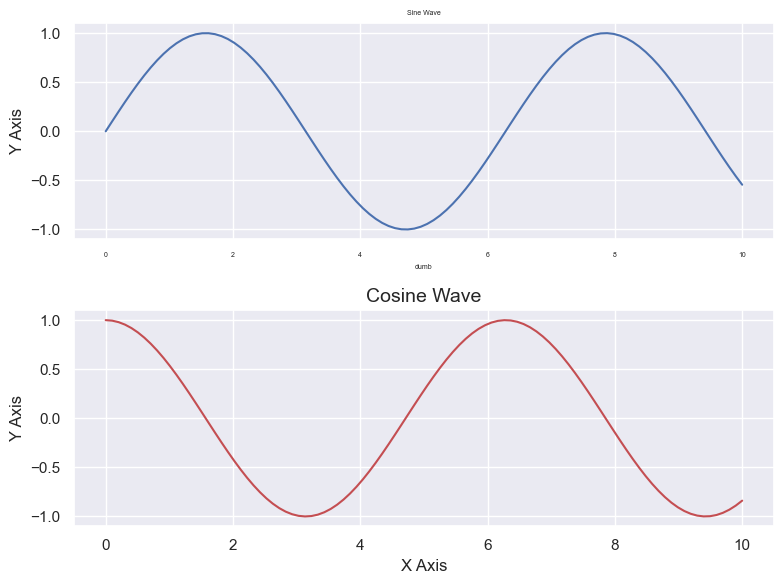

In [102]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 6))  # 2 rows, 1 column

# Plotting on the first subplot
ax[0].plot(x, y1, label='Sine')
ax[0].set_title('Sine Wave', fontsize=5)   # Title size
ax[0].set_xlabel('dumb', fontsize=5) 
ax[0].tick_params(axis = 'x',labelsize=5)# X-axis label size
ax[0].set_ylabel('Y Axis', fontsize=12)      # Y-axis label size

# Plotting on the second subplot
ax[1].plot(x, y2, label='Cosine', color='r')
ax[1].set_title('Cosine Wave', fontsize=14)  # Title size
ax[1].set_xlabel('X Axis', fontsize=12)      # X-axis label size
ax[1].set_ylabel('Y Axis', fontsize=12)      # Y-axis label size

# Adjust layout
plt.tight_layout()

In [105]:
metrics.mean_squared_error(Y_test,test_rf_predict)

24692921.12169746

In [107]:
metrics.mean_absolute_percentage_error(Y_test,test_rf_predict)

0.3840941235199003

In [110]:
# Example dictionary
my_dict = {'a': 1, 'b': 2, 'c': 3}

# Retrieve the first key-value pair
next(iter(my_dict.items()))


('a', 1)

In [111]:
my_dict = {'Linear Regression': 0.7447273869684077, 'Random Forest': 0.8377253857948795, 'Gradient Boosting': 0.8680324633032896}

In [112]:
second_key = list(my_dict.keys())[1]

In [ ]:
second_key